In [1]:
# import
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.stats

# Histograms and the binomial distribution

Histograms provide a visual representation of the empirical distribution of a data set.

In this lab, we will simulate numerical experiments with random number generators to illustrate how histograms can be used to infer (deduce or conclude something) the true probability distribution of our random variables and the impact of finite data sets on our estimates.

For simplicity, we will start with an experiment with discrete random variables (the roll of a dice). In the second part of the lab, we will move on to continuous random variables.

## Part 1: Discrete Random Variables : The roll of a dice

Consider a discrete random variable \(Y\) that can take any of the possible values in $\{y_1,\ldots,y_n\}$. To estimate the probability of each value, $p_n$, we can count the frequency with which each $y_i$ occurs in our data set. This intuitive idea is justified by the law of large numbers, but we can easily illustrate it here by modeling the counting process with the binomial distribution.

For clarity, we assume that the true probability of observing $y_i$ is $p_i$.

The process of checking whether our random variable $y$ matches a given value $y_i$ (e.g., a particular digit in a die) can be treated as a Bernoulli trial assigned to the random variable $X_i$, where "success" ($x_i=0$) means that $Y=y_i$, and "failure" ($x_i=1$) means that $Y|\neq y_i$. Since we are describing histograms, we refer to the event $Y=y_i$, as $Y$ being in bin $i$.

In a set of $N$ trials (e.g., $N$ dice rolls), the number of times we observe $Y=y_i$ is also a random variable

$$K_i=\sum_{n=1}^N X_{i,n}.$$

As we discussed in class, $K_i$ follows a binomial distribution:
$$ P(K_i=k) =B(k,p,N)= \binom{N}{k} p_i^k (1-p_i)^{N-k} $$

**Exercises (analytical)**
1. Calculate the expected number of observations in bin \(x_i\) as a function of $p_i$ and $N$.
2. Determine the expected standard deviation (or error) from this theoretical mean for Bin $i$.

In [2]:
# Obtain E[k] and Var[k] as a function of N and p

# Expected values = Mean
def mean(N,p):
    mu =  N * p
    return mu

# Standard Deviation = Variance
def standard_deviation(N,p):
    sigma = np.sqrt(N * p * (1-p))
    return sigma

def variance(N,p):
    sigma2 = N * p * (1-p)
    return sigma2

### Counting repetitions

Our numerical experiment will mimic a dice rolling experiment. To do this, we will randomly generate dice numbers with a uniform distribution, count how many times we get each of the 6 digits, and try to estimate their respective probabilities from analysis of the data.

Now let's count how many times I observe a particular outcome in a series of $N$ trials.

**Exercise (numerical)**

3. We simulate rolling a die by uniformly generating a random number between 1 and 6, i.e., the probability of getting every possible digit is $p=1/6$. Prepare a function that returns the result of a set of $N$ trials

In [3]:
# We generate N random numbers, each corresponding to the number displayed after a die roll
# The function random.randint(A,B, size = N) generates a vector of size N composed by random numbers between A and B with uniform probability.

def throw_dice(N): # roll N dices
    return np.random.randint(1, 7, size=N)


# We show the series of numbers obtained with each throw of the dice
print("Randomly obtained results:", throw_dice(10))

Randomly obtained results: [5 2 3 2 3 5 4 6 3 4]


4. Now let's count how many times I observe a given outcome in a set of $N$ trials. To do this, follow the steps below:

    a. Define a function to count how many times each number occurs

In [4]:
# Function to count how many times a certain value appears within the random experiment 
def count_elements(X,Nmax=6):
    # count[0] -> Number of 1's, count[1] -> Number of 2's, ...
    count = np.zeros(Nmax)
    for value in X:
        count[value-1] = count[value-1] + 1
    return count.astype(int)

#Generate a sequences of numbers
N=10

X=throw_dice(N)
# We show the sequence of randomly obtained values
print("Randomly obtained values:", X)

# Example of expected result from the function "count_elements"
print("Elements counted:", count_elements(X, 6))

# Print the number of times we get each number
print([str(i+1)+":"+str(c) for i,c in enumerate(count_elements(X))])

Randomly obtained values: [5 4 5 3 1 3 1 6 4 5]
Elements counted: [2 0 2 2 3 1]
['1:2', '2:0', '3:2', '4:2', '5:3', '6:1']


b. Plot the results on a bar graph and compare them to the theoretical mean and standard deviation. 


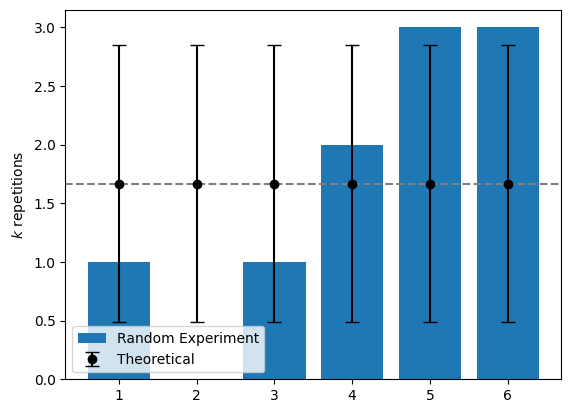

In [5]:
"""
N = 10
X = throw_dice(N)
print("Elements counted:", count_elements(X, 6))
probabilities_obtained = [counts / 6 for counts in count_elements(X,6)]
"""
theoritical_probability = 1/6
N=10

# Theoretical mean
mean_list = [ mean(N,theoritical_probability) for i in range(6)]
#print("Mean:", mean)

# Theoretical standard deviation
error_list = [standard_deviation(N, theoritical_probability) for i in range(6)]
#print("Variance:", error)

# We plot the counts of each number
plt.bar(np.arange(1,7),count_elements(throw_dice(N)), capsize=5,label='Random Experiment') 

# We compare with the theoretical expectation
plt.errorbar(np.arange(1,7), mean_list, yerr = error_list, fmt='o', capsize=5, color='black', label='Theoretical')
plt.axhline(y=mean_list[0], ls='--', color='gray')

plt.ylabel(r'$k$ repetitions')
plt.legend()
plt.show()

c. How does this change if you increase the number of die rolls per experiment?


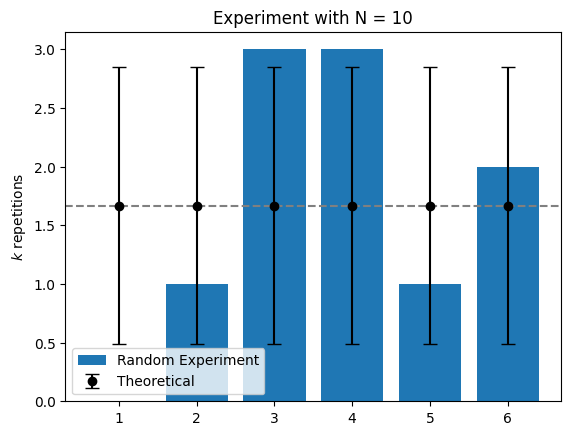

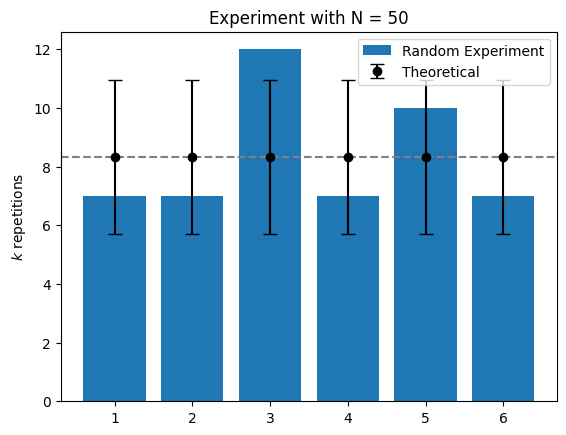

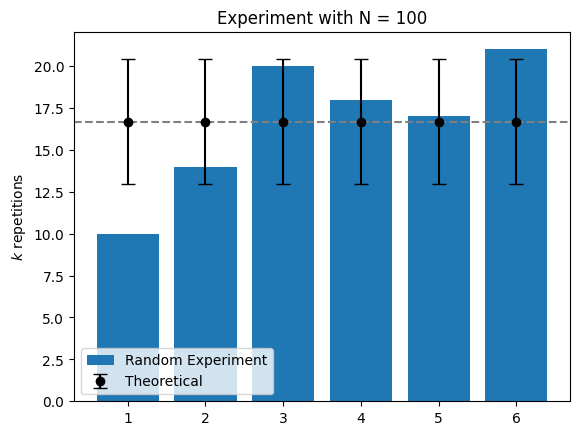

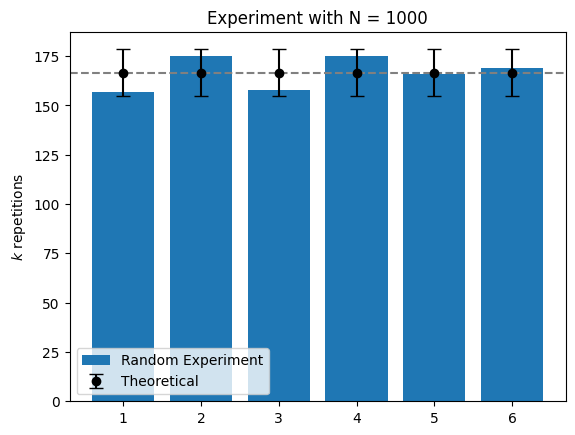

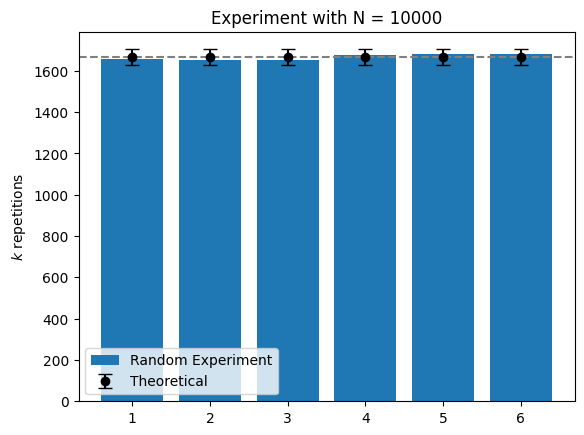

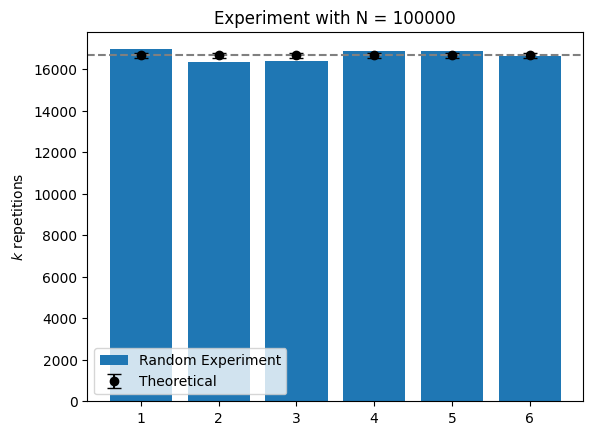

In [6]:
p=1/6.

for N in [10, 50, 100, 1000, 10000, 100000]:
    mean_list = [ mean(N,theoritical_probability) for i in range(6)]
    error_list = [standard_deviation(N, theoritical_probability) for i in range(6)]
    # We plot the counts of each number
    plt.bar(np.arange(1,7), count_elements(throw_dice(N)), capsize=5,label='Random Experiment') 

    # We compare with the theoretical expectation
    plt.errorbar(np.arange(1,7), mean_list, yerr=error_list, fmt='o', capsize=5, color='black', label='Theoretical')
    plt.axhline(y=mean_list[0], ls='--', color='gray')

    plt.ylabel(r'$k$ repetitions')
    plt.legend()
    plt.title(f"Experiment with N = {N}")
    plt.show()

You can repeat the experiment several times and you will get different results. Most likely, you will get several counts that do not agree the expected value and the expected variation. Does this mean that there is a problem with the random number generator? The general answer is: it depends.

If we know the theoretical distribution, the binomial distribution, we can calculate the probability that it will not match the error

$$(\mu-\sigma > k > \mu+\sigma)=1-P(\mu-\sigma < k < \mu+\sigma)=1-\sum_{k=[\mu-\sigma k]}^{[\mu+\sigma k]} B(k,N,p)$$

d. For the above values of $N$, estimate the probability that the number of hits within the error is inconsistent with the theoretical values. How many of our counts do we expect to be inconsistent with the expected values? 

In [7]:
# We can compute the Binomial distribution by using the code binom.pmf(k, N, p)
from scipy.stats import binom 


for N in [10, 100, 1000, 10000]:
    
    sum_prob=0
    
    p = (1./6)
    
    #print(mean[0], error[0], "\n")
    
    # Minimum of the interval
    min_k = int(mean(N,p) - standard_deviation(N,p))

    # Maximum of the interval
    max_k = int(mean(N,p) + standard_deviation(N,p))
    print("Minimum:", min_k, "Maximum:", max_k)

    for k in range(min_k, max_k + 1):
        sum_prob+=binom.pmf(k, N, p)
        
    prob_out = 1-sum_prob    
    print(N,': prob=', prob_out, 'out of six:', prob_out*6)

Minimum: 0 Maximum: 2
10 : prob= 0.22477320212874075 out of six: 1.3486392127724445
Minimum: 12 Maximum: 20
100 : prob= 0.22960706910147055 out of six: 1.3776424146088233
Minimum: 154 Maximum: 178
1000 : prob= 0.28905097532665147 out of six: 1.7343058519599088
Minimum: 1629 Maximum: 1703
10000 : prob= 0.31432415205347486 out of six: 1.8859449123208492


### Normalized histogram 

Instead of wondering about how often the die gives a certain number as a result, let us use it to estimate the frequency with which we get each of the numbers, which can be used as an approximation for the real probability $p_n$. The frequency is nothing more than the number of success numbers in my bin divided by the total number of trials. In other words, we now want to describe the statistics of normalized random variable:

$Z_i=\frac{1}{N}\sum_{n=0}^N X_{i,n}=\frac{K_i}{N}$

where $X_i$ is the random variable corresponding to the Bernouilli trial of being in bin $i$.

5. Which is the theoretical mean and the expected standard deviaton of this new normalized variable?



In [8]:
def normalized_mean(N,p):
    return p

def normalized_standard_deviation(N,p):
    return np.sqrt((p * (1-p)) / N)

def normalized_variance(N,p):
    return (p * (1-p)) / N

6. Compute the the empirical frequency of appearance of each of the 6 numbers and compare them with the expected value and expected standard deviation. How accurate is this estimation as $N$ grows?

10


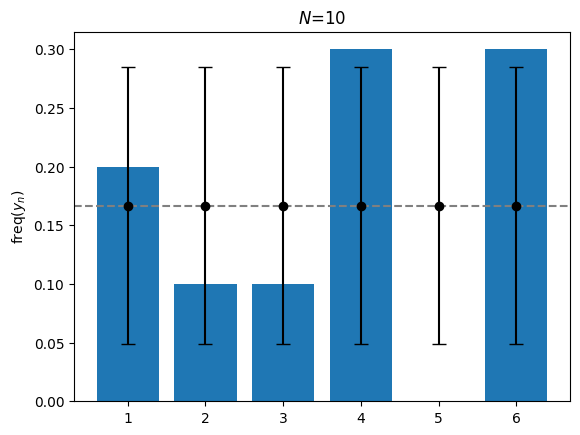

100


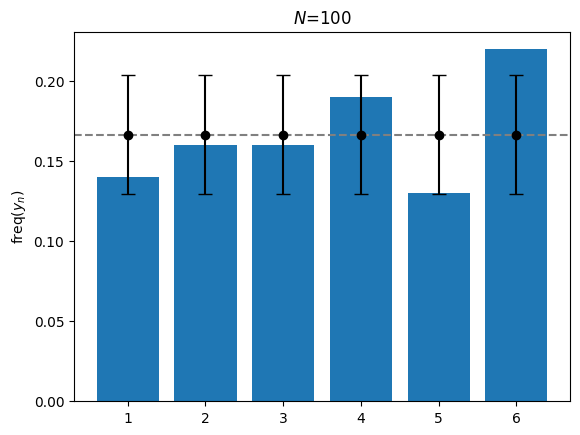

1000


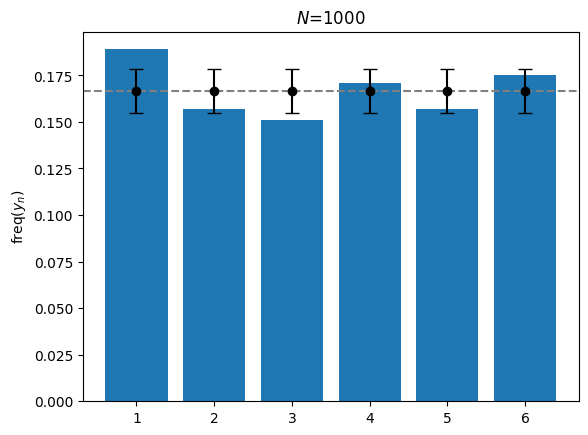

10000


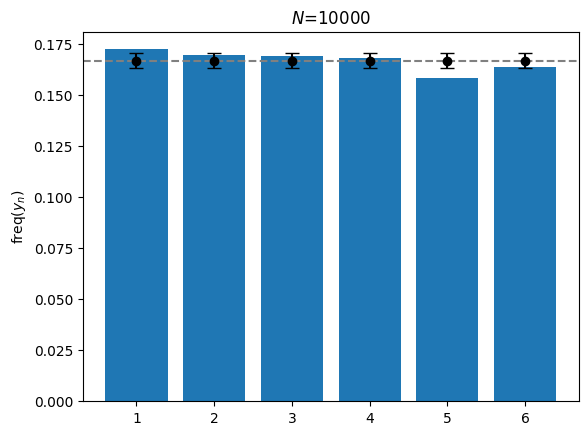

100000


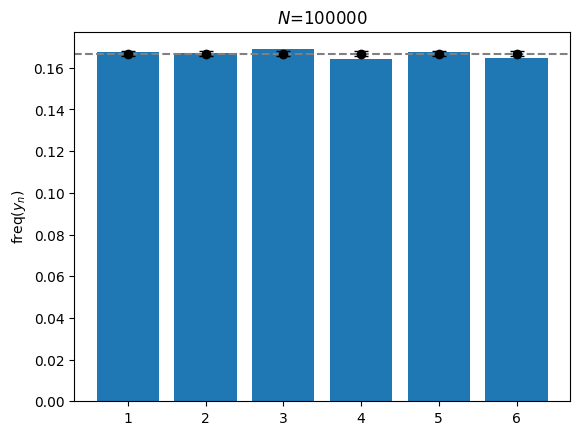

In [9]:
# Confirm

p = 1/6.


for N in [10, 100, 1000, 10000,100000]:

    print(N)
    #Theoritical normalized mean of Z
    normalized_mean_list = [ normalized_mean(N,p) for i in range(6)]
    #print(mean)
    
    #Theoritical normalized standard deviation of Z
    normalized_error_list =[ normalized_standard_deviation(N,p) for i in range(6)]
    #print(error)
    
    # Count the number of repetions and normalize it by the number of trials
    X = throw_dice(N)
    frequency = count_elements(X, 6) / N
    #print(frequency)
    #print("\n")
    
    
    plt.bar(np.arange(1,7), frequency, capsize=5,label='experiment')
    plt.errorbar(np.arange(1,7), normalized_mean_list, yerr=normalized_error_list,fmt='o', capsize=5,color='black',label='theoretical')
    
    plt.title(r'$N$='+str(N))
    plt.axhline(y=1./6.,ls='--',color='gray')
    plt.ylabel(r'freq$(y_n)$')

    plt.show()

### Central limit theorem

The law of large numbers states that $\mu_Z \to p$ as $N\to\infty$, and that $\sigma^2_Z=\frac{\sigma_K^2}{N}$. This ensures that as the number of repetitions $N$ increases, our estimate of the probability of each event becomes finer and finer, but also that the expected fluctuations become smaller and smaller!

The central limit theorem goes even further: it states that $Z$ becomes Gaussian distributed $\mathcal{N}(\mu,\sigma^2)$ as the number of repetitions $N$ increases.

7. We have argued that $K_i=N Z_i$ (and hence $Z$) is distributed as a binomial distribution. We can verify that this is indeed the case by repeating our experiment (rolling $N$ dices) $T=1000$ times. And examine the histogram of the results with the binomial and normal distributions. Follow the steps below to do this:

 a. Now consider repeating the same experiment T times and record the number of repetitions you get for each of the numbers. Since all the numbers have the same probability, we can add up all the results in the same vector of values of k_i.

 b. Calculate a histogram of the ks obtained to estimate the frequency with which we obtain each value.
 Plot k/N against this frequency.

 c. Compare the shape of the histograms as you change $N$
 
 d. For each value of $N$ compare the empirical frequency with the binomial and the normal distribution


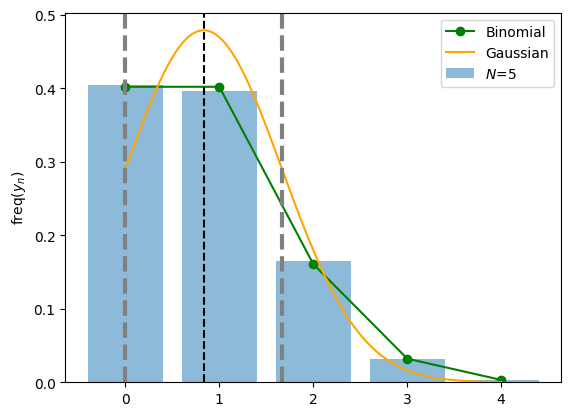

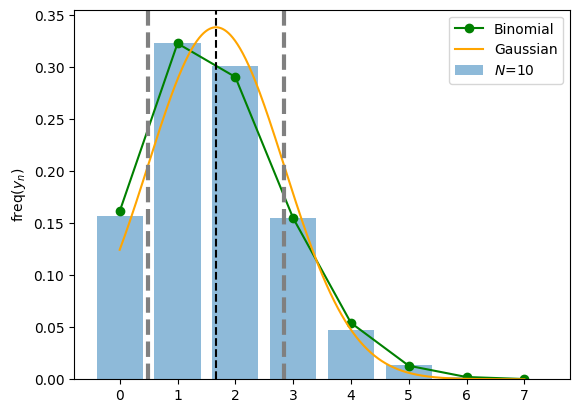

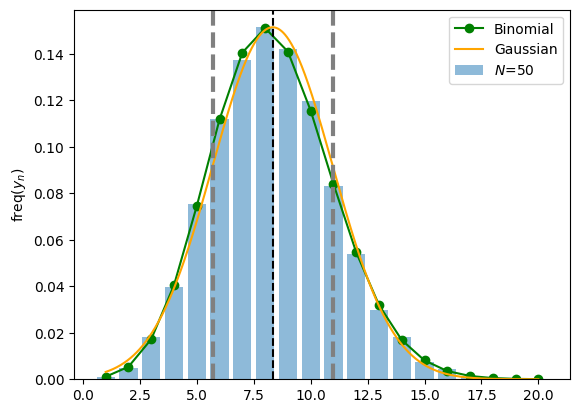

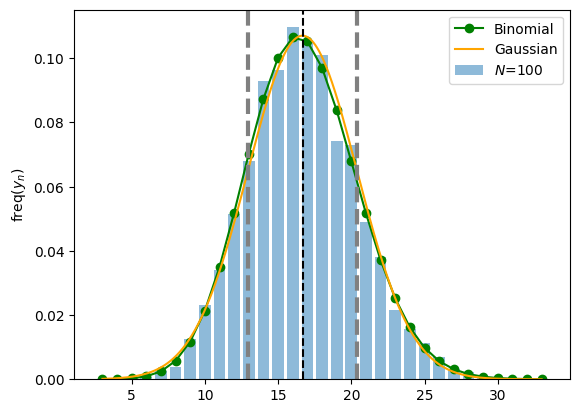

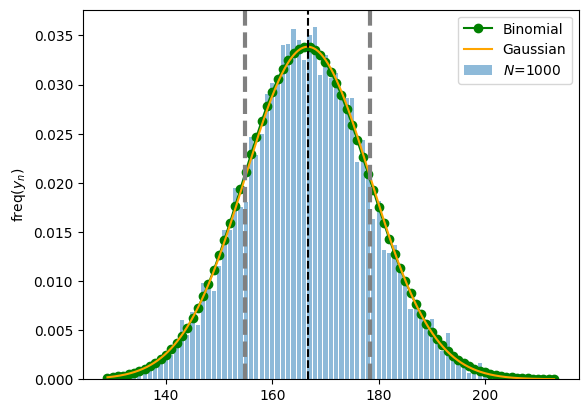

In [10]:
def gauss(x,mu,sigma2):
    return 1./np.sqrt(2*np.pi*sigma2)*np.exp(-(x-mu)**2/(2*sigma2))

def count_elements_integer(X):
    N_min = np.min(X)
    N_max = np.max(X)
    
    count = np.zeros(N_max-N_min+1)
    for x in X:
        count[x-N_min]+=1
    return np.arange(N_min,N_max+1),count.astype(int)

T = 1000


for N in [5,10,50,100,1000]:
    Results = np.zeros((T,6))
    for t in range(T):
        X = throw_dice(N)
        Results[t] = count_elements(X, 6)
    # Results is a list of lists of 6 integers where we have all the counted values
    #print(Results)
    
    # Since all numbers have the same probability, we can add up all the statistics of all them for the analysis
    # We reshape a list of a 1000 6-dimension lists into a list of 6000 values, basically we delete the lists inside and have directly the values
    p_k = Results.reshape(6*T).astype(int)
    
    my_range, my_hist = count_elements_integer(p_k)
    #print("Range:", my_range)
    #print("Shape of histogram:", my_hist, "\n")
    
    
    plt.bar(my_range, my_hist/(6*T), label=r'$N$='+str(N), alpha=0.5)
    
    
    # Binomial probability
    p = 1./6
    bi_prob = binom.pmf(my_range, N, p)
    plt.plot(my_range, bi_prob,'o-',color='green',label='Binomial')
    
    
    x = np.linspace(my_range[0], my_range[-1], 1000)
    mu = mean(N,p)
    sigma2 = variance(N,p)
    plt.plot(x, gauss(x, mu, sigma2), color='orange', label='Gaussian')
    
    
    plt.axvline(x = mu, ls='--', color = 'black')
    plt.axvline(x = mu-np.sqrt(sigma2),ls = '--', lw = 3, color = 'gray')
    plt.axvline(x = mu+np.sqrt(sigma2),ls = '--', lw = 3, color = 'gray')
    plt.ylabel(r'freq$(y_n)$')
    plt.legend()
    
    
    plt.show()


### Area under the Gaussian

We want to estimate the probability of getting values at certain distance of the expected value.
For this it is convenient to use the **error function**:
 
$$erf(z)=\frac{2}{\sqrt{\pi}}\int_0^z e^{-x^2}$$

Using this function, the cumulative distribution function of the $\mathcal{N}(\mu,\sigma)(x)$ is
$$F(x | \mu, \sigma^2) = \frac{1}{2} \left[ 1 + \text{erf}\left(\frac{x - \mu}{\sigma\sqrt{2}}\right) \right]$$

And the area between two values $a$ and $b$
$$\text{Area between } a \text{ and } b = F(b | \mu, \sigma^2) - F(a | \mu, \sigma^2)$$


(i) Proof these two expressions

(ii) Estimate the probability of  $|k-\mu|>\sigma$, $|k-\mu|>2\sigma$, $|k-\mu|>3\sigma$

### PROOFS

(i) Let's begin with the first proof.

Gaussian Distribution Function:

$$\mathcal{N}(\mu,\sigma^2)(x) = \frac{1}{\sigma\sqrt{2\pi}}\exp^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

Cumulative function definition:
$${\displaystyle F_{X}(x)=\int _{-\infty }^{x}f_{X}(y)\,dy~.}$$

Cumulative function applied with Gaussian Distribution Function:
$$F(x | \mu, \sigma^2) = \int_{-\infty}^x \mathcal{N}(\mu,\sigma^2)(y) dy ~.$$

Then, developing the expression:

$$
\begin{align}
F(x | \mu, \sigma^2) &= \int_{-\infty}^x  \frac{1}{\sigma\sqrt{2\pi}}\exp^{-\frac{(y-\mu)^2}{2\sigma^2}} dy \\
&=_{z= \frac{x-\mu}{\sqrt{2}\sigma}} \frac{1}{\sqrt{\pi}}\int_{-\infty}^\frac{x-\mu}{\sqrt{2}\sigma}\exp^{-z^2}dz \\
&= \frac{1}{\sqrt{\pi}}\bigg[ \ \int_{-\infty}^{0}\exp^{-z^2}dz + \int_{0}^{\frac{x-\mu}{\sqrt{2}\sigma}}\exp^{-z^2}dz \bigg] \ \\
&=_{\int_{-\infty}^{0}\exp^{-z^2}dz~=~\frac{\sqrt{\pi}}{2}} \frac{1}{\sqrt{\pi}}\bigg[ \ [\frac{\sqrt{\pi}}{2}] + \frac{\sqrt{\pi}}{2}erf\bigg(\frac{x-\mu}{\sigma\sqrt{2}}\bigg)  \bigg] \ \\
&= \frac{1}{\sqrt{\pi}}\bigg[ \ \frac{\sqrt{\pi}}{2} * [1~+~erf\bigg(\frac{x-\mu}{\sigma\sqrt{2}}\bigg)]  \bigg] \\
&= \frac{1}{2} \bigg[ \ 1 + erf\bigg(\frac{x-\mu}{\sigma\sqrt{2}}\bigg)  \bigg] \ \\
\end{align}
$$

Let's prove the second expression:

$$
\begin{align}
\text{Area~(a,b)} &= \int_{a}^{b} \mathcal{N}(\mu,\sigma^2)(x) dx \\
&= \int_{-\infty}^{b}\mathcal{N}(\mu,\sigma^2)(x)dx + \int_{a}^{-\infty}\mathcal{N}(\mu,\sigma^2)(x)dx \\
&= \int_{-\infty}^{b}\mathcal{N}(\mu,\sigma^2)(x)dx - \int_{-\infty}^{a}\mathcal{N}(\mu,\sigma^2)(x)dx \\
&= F(b~|~\mu,~\sigma^2) - F(a~|~\mu,~\sigma^2)
\end{align}
$$


### ESTIMATIONS

(ii) Let's consider the first case $|k-\mu|>\sigma$ and determine its probability:

$
\begin{align}
P(|k-\mu|>\sigma) &= 1 - P(|k-\mu|\leq\sigma) \\
&= 1 - P(~-\sigma \leq k-\mu \leq~\sigma) \\
&= 1 - P(~-\sigma + \mu~\leq k \leq~\sigma + \mu) \\
&= 1 - \text{Area}(\mu-\sigma, \mu+\sigma) \ \\
&= 1 - F(\mu+\sigma | \mu, \sigma^2) + F(\mu-\sigma | \mu, \sigma^2) \\
\end{align}
\\
$

Considering the second case: $|k-\mu|>2\sigma$

$
\begin{align}
P(|k-\mu|>2\sigma) &= 1 - P(|k-\mu|\leq~2\sigma) \\
&= 1 - P(~-2\sigma \leq k-\mu \leq~2\sigma) \\
&= 1 - P(~-2\sigma + \mu~\leq k \leq~2\sigma + \mu) \\
&= 1 - \text{Area}(\mu-2\sigma, \mu+2\sigma) \ \\
&= 1 - F(\mu+2\sigma | \mu, \sigma^2) + F(\mu-2\sigma | \mu, \sigma^2) ~~~,\\
\end{align}
$

Finally, considering the third case:

$
\begin{align}
P(|k-\mu|>3\sigma) &= 1 - P(|k-\mu|\leq~3\sigma) \\
&= 1 - P(~-3\sigma \leq k-\mu \leq~3\sigma) \\
&= 1 - P(~-3\sigma + \mu~\leq k \leq~3\sigma + \mu) \\
&= 1 - \text{Area}(\mu-3\sigma, \mu+3\sigma) \ \\
&= 1 - F(\mu+3\sigma | \mu, \sigma^2) + F(\mu-3\sigma | \mu, \sigma^2) ~~~,\\
\end{align}
$


In [11]:
# We consider mu = 0 and sigma = 1 for the estimations
from scipy.special import erf

def gaussian_area(a, b):
    return 0.5 * (erf(b/np.sqrt(2)) - erf(a/np.sqrt(2)))


print("The probability of obtaining results 1 sigma away is:", 1 - gaussian_area(-1,1))
print("The probability of obtaining results 2 sigma away is:", 1 - gaussian_area(-2,2))
print("The probability of obtaining results 3 sigma away is:", 1 - gaussian_area(-3,3))

The probability of obtaining results 1 sigma away is: 0.31731050786291415
The probability of obtaining results 2 sigma away is: 0.04550026389635842
The probability of obtaining results 3 sigma away is: 0.002699796063260207


## Part 2: Continous random variables

Normally, our random variables have continuous support. In such cases, the situation is very similar to the previous one, but now we discretize the support to form bins. Once the bins are defined, everything said before about the binomial distribution applies. As before, we can consider the non-normalized version, where we only count the number of hits in that bin, or the normalized case, where we need to normalize not only by the number of entries, but also by the size of the bin, if we want to obtain a function whose integral is 1.

Now we generate numbers following an exponential distribution

$$
f(x,\lambda) = 
\begin{cases} 
\lambda e^{-\lambda x} & \text{for } x \geq 0 \\
0 & \text{for } x < 0 
\end{cases}
$$

1. Obtain the expected value of $X$ and the Variance.


In [17]:
# Parameters
lamb = 1.0  

# Number of random numbers to generate
N = 1000

# List of values of the exp distribution 
va = np.random.exponential(1/lamb, N)

def f(x,lamb):
    return lamb*np.exp(-lamb*x)

def mean_exp_dist(lamb):
    if lamb != 0:
        return 1/lamb

def variance_exp_dist(lamb):
    if lamb != 0:
        return 1/((lamb)**2)

print("(Theoritical value, Empirical value):", (mean_exp_dist(lamb), sum(va) / N))

(Theoritical value, Empirical value): (1.0, 0.9994450114128047)


2. Create a function to obtain a normalized histogram of an array of numbers

3. Which are the expected values for each interval?

Unnormalized: [263 210 159 108  80  50  45  20  18  14  13   4   6   1   2   2   2   1
   0   2]
Normalized: [0.78645206 0.62796552 0.47545961 0.3229537  0.23922496 0.1495156
 0.13456404 0.05980624 0.05382562 0.04186437 0.03887406 0.01196125
 0.01794187 0.00299031 0.00598062 0.00598062 0.00598062 0.00299031
 0.         0.00598062]


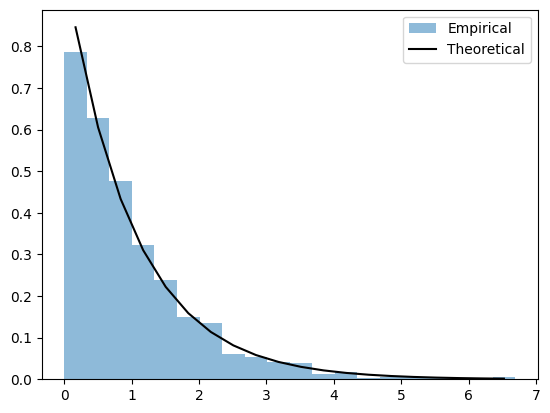

In [50]:
# Do an histogram
# seq = array of numbers, NBins = number of bins for the histogram
def count_elements(seq, NBins):
    # Minimum value of the edges of the bins
    BInf=np.min(seq)
 
    # Maximum value of the edge of the bins
    BSup=np.max(seq)
    
    δ = (BSup-BInf)/NBins
    
    # hist is the array that counts the number of elements for each bin
    # bins is the edges of each bin (intervals [a,b) that comprises the elements)
    # Nbins is the number of bins we want the histogram to have
    hist, bins = np.histogram(seq, bins = NBins, range = (BInf, BSup))
    
    norm = np.sum(hist) * δ

    # bins gives an array with the mid point in the interval
    bins = (bins[:-1] + bins[1:]) / 2
    return hist, norm, bins, δ

NBins = 20

h1, norm, bins, δ  = count_elements(va, NBins)

# Unnormalized
print("Unnormalized:", h1)

# Normalized
print("Normalized:", h1/norm)

x=bins
# plot the normalized histogram
plt.bar(bins,h1/norm,width=δ ,alpha=0.5,label='Empirical')

#theoretical distribution
plt.errorbar(x, f(x, lamb),color='black',label='Theoretical')
plt.legend()
plt.show()

4. Repeat the experiment $T=1000$ times and plot the distribution of the average of $X$, and compare with the Gaussian distribution expected.

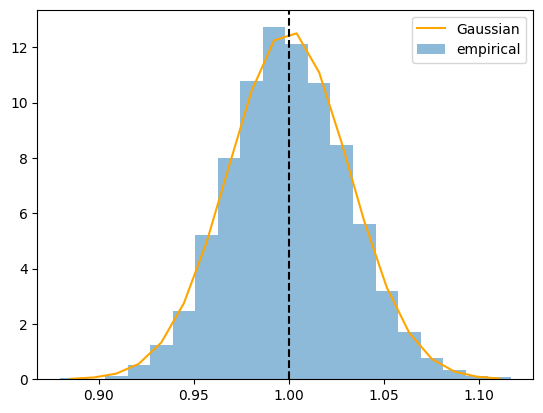

In [51]:
T = 10000
N = 1000
Results = np.zeros(T)
for t in range(T):
    Results[t] = np.mean(np.random.exponential(1/lamb, N))    

NBins = 20
h1, norm, bins, δ  = count_elements(Results, NBins)
x = bins

# Gaussian dist
mu = mean_exp_dist(lamb)
sigma2 = variance_exp_dist(lamb) / N
plt.plot(x,gauss(x,mu,sigma2),color='orange',label='Gaussian')

plt.axvline(x=mu,ls='--',color='black')
plt.bar(bins,h1/norm,width=δ ,alpha=0.5,label='empirical')
plt.legend()
plt.show()